### Name - Bolonghe B.P.M
### Index No - 190095C

##### Question 1

In [307]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
# np . random . seed ( 0)
N = 100
half_n = N//2
r = 10
s = r /16
t = np.random.uniform (0 , 2*np.pi , half_n )
n = s*np.random.randn(half_n)
x , y = (r+n)*np.cos(t),(r+n)*np.sin(t)

X_circ = np.hstack((x.reshape(half_n , 1),y.reshape(half_n,1)))
m, b = -1, 2
x = np.linspace(-12, 12 , half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n , 1),y.reshape(half_n , 1)))
X = np.vstack((X_circ,X_line))

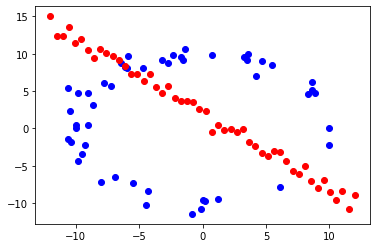

In [443]:
# plt.plot(X_circ[:,0],X_circ[:,1],'o',color='b')
# plt.plot(X_line[:,0],X_line[:,1],'o',color='r')


In [308]:
import random
def RadiusAndCenter(randomPoints):

    # taking 3 points
    A_c =X[randomPoints[0]]
    B_c = X[randomPoints[1]]
    C_c = X[randomPoints[2]]

    middle_AB = [(A_c[0]+B_c[0])/2,(A_c[1]+B_c[1])/2] # take the middle point on AB line
  
    middle_BC = [(B_c[0]+C_c[0])/2,(B_c[1]+C_c[1])/2] # take the middle point on BC line
   

    if (B_c[1]-A_c[1])!=0 and (C_c[1]-B_c[1])!=0:
        AB_perpendiular_gradient = -(B_c[0]-A_c[0])/(B_c[1]-A_c[1])       
        BC_perpendiular_gradient = -(C_c[0]-B_c[0])/(C_c[1]-B_c[1])        

        AB_perpendiular_C = middle_AB[1]-AB_perpendiular_gradient*middle_AB[0]        
        BC_perpendiular_C = middle_BC[1]-BC_perpendiular_gradient*middle_BC[0]        

        Center_X = (BC_perpendiular_C-AB_perpendiular_C)/(AB_perpendiular_gradient-BC_perpendiular_gradient)
        Center_Y = AB_perpendiular_gradient*Center_X + AB_perpendiular_C

    elif (B_c[1]-A_c[1])==0:
        BC_perpendiular_gradient = -(C_c[0]-B_c[0])/(C_c[1]-B_c[1]) 

        BC_perpendiular_C = middle_BC[1]-BC_perpendiular_gradient*middle_BC[0]  

        Center_Y = B_c[1]
        Center_X = (Center_Y-BC_perpendiular_C)/BC_perpendiular_gradient

    elif (C_c[1]-B_c[1])==0:
        AB_perpendiular_gradient = -(B_c[0]-A_c[0])/(B_c[1]-A_c[1]) 
        AB_perpendiular_C = middle_AB[1]-AB_perpendiular_gradient*middle_AB[0] 

        Center_Y = B_c[1]
        Center_X = (Center_Y-AB_perpendiular_C)/AB_perpendiular_gradient

    radius = ((Center_Y-A_c[1])**2 + (Center_X-A_c[0])**2)**0.5

    return Center_X,Center_Y,radius

In [309]:
def DistanceBW2Pts(pt1,pt2):
    return ((pt2[1]-pt1[1])**2+(pt2[0]-pt1[0])**2)**0.5

print(DistanceBW2Pts(RadiusAndCenter([0,1,2])[0:2],X_circ[0]))
    

10.577776077548956


In [310]:
threshold =1

pointsList=[]
countlist = []
iterations = 35
inliers = []
for k in range(iterations):
    count = 0
    randomPoints = []
    for i in range(3):
        randomPoints.append(random.randint(0,99))
    pointsList.append(randomPoints)
    for j in range(100):
       
        if abs(DistanceBW2Pts(RadiusAndCenter(randomPoints)[0:2],X[j])-RadiusAndCenter(randomPoints)[2]) <= threshold:
            count+=1
            
    countlist.append(count)


pt =RadiusAndCenter(pointsList[countlist.index(max(countlist))])



In [312]:
def ransac(P_list):
    threshold =1

    pointsList=[]
    countlist = []
    iterations = 35
    
    for k in range(iterations):
        count = 0
        randomPoints = []
        for i in range(3):
            randomPoints.append(random.randint(0,len(P_list)-1))
        pointsList.append(randomPoints)
        for j in range(len(P_list)):
            # print(DistanceBW2Pts(RadiusAndCenter(randomPoints)[0:2],X_circ[j]))
            if abs(DistanceBW2Pts(RadiusAndCenter(randomPoints)[0:2],P_list[j])-RadiusAndCenter(randomPoints)[2]) <= threshold:
                count+=1
                
        countlist.append(count)

    pt =RadiusAndCenter(pointsList[countlist.index(max(countlist))])
    return pt

In [313]:
points = ransac(X)


In [314]:
threshold = 1
inliers = []
for j in range(100):
    if abs(DistanceBW2Pts(points[0:2],X[j])-points[2]) <= threshold:
        inliers.append(j)

In [315]:
Outliers =[]
for i in range(100):
    if i not in inliers:
        Outliers.append(i)

In [316]:
bestFit = np.array([X[j] for j in inliers])
bestFit

BF = ransac(bestFit)
print(BF)

(0.3907321154629146, -0.13813393319239556, 9.61962333699298)


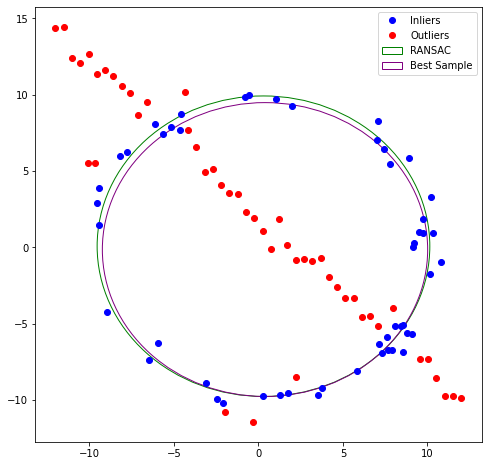

In [323]:
plt.figure(figsize=(8,8))
X1=[]
Y1=[]
for item in inliers:
    X1.append(X[item][0])
    Y1.append(X[item][1])
    #plt.plot(X[item][0],X[item][1],'o',color='b',label="Inliers")
plt.plot(X1,Y1,'o',color='b',label="Inliers")

X2=[]
Y2=[]
for item in Outliers:
    X2.append(X[item][0])
    Y2.append(X[item][1])
    #plt.plot(X[item][0],X[item][1],'o',color='r',label="Outliers")
plt.plot(X2,Y2,'o',color='r',label="Outliers")

circle = plt.Circle((points[0],points[1]),points[2],fill=False,color='g',label="RANSAC")
circle2=plt.Circle((BF[0],BF[1]),BF[2],fill=False,color='purple',label="Best Sample")
# circle = plt.Circle((0,0),5)
plt.gca().add_patch(circle)
plt.gca().add_patch(circle2)
plt.legend()
plt.show()



#### Discussion

In Question 1, what I have done is that took any random three points and make a circle which goes through that three points. Then I have calculated the radius and the Center coordinates of that circle. Then I checked how many inliers around that circle and give a count according to number of inliers.After that I did the same thing 35 times and got the circle which have madximum inliers. Then I got the best sample by doing the same thing for inliers that I have calulated in the previous case.

### Question 2

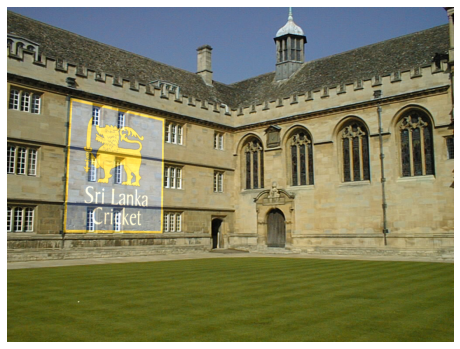

In [303]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

points = []
def mousePoints(event,x,y,flags,params):
    
    if event == cv.EVENT_LBUTTONDOWN:        
        points.append([x,y])

img1 = cv.imread(r"./images/001.jpg")
assert img1 is not None
img2 = cv.imread(r"./images/Logo_of_Sri_Lanka_Cricket.png")
assert img2 is not None

cv.imshow("Image",img1)
cv.setMouseCallback("Image",mousePoints)
cv.waitKey(0)
cv.destroyAllWindows()

# img2 = cv.imread(r"./images/Flag_of_the_United_Kingdom.svg.png")
# assert img2 is not None

des = np.array(points)
src = np.array([[0,0],[316,0],[0,316],[316,316]])

h, status = cv.findHomography(src, des)
im_out = cv.warpPerspective(img2, h, (img1.shape[1],img1.shape[0]))
im_out = cv.addWeighted(img1,1,im_out,0.5,0)
im_out = cv.cvtColor(im_out,cv.COLOR_BGR2RGB)

fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(im_out)
ax.set_aspect('equal')
ax.axis('off')
plt.show()



#### Discussion
In this question (Question 2), One image have been superimposed into another image. It's done by computing the homography matrix using mouse clicking coordinates of one image and boundary coordinates of other image.


### Question 3

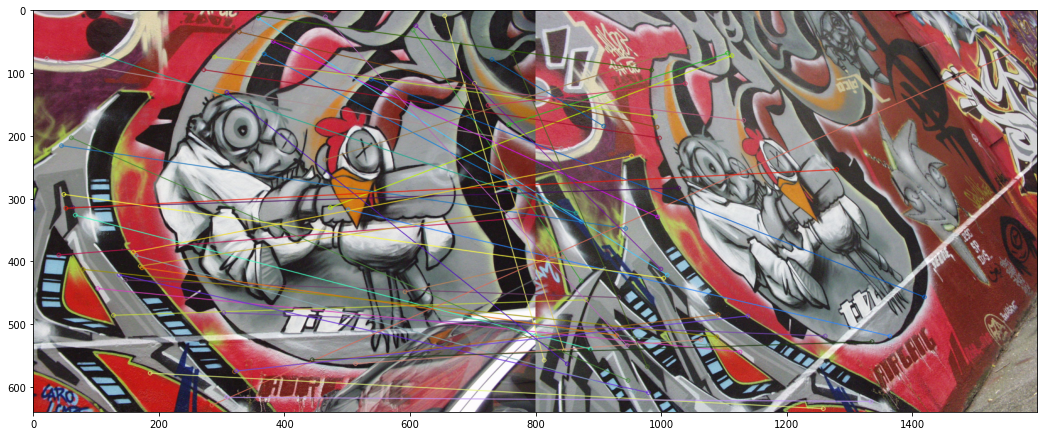

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img1 = cv.imread(r'./Images/img1.ppm')
img4 = cv.imread(r'./Images/img4.ppm')
assert img1 is not None

#img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
#img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)


sift = cv.SIFT.create()
keyPoints1,Discriptor1 = sift.detectAndCompute(img1,None)
keyPoints2,Discriptor2 = sift.detectAndCompute(img4,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(Discriptor1,Discriptor2)
matches = sorted(matches, key= lambda x:x.distance)

img3 = cv.drawMatches(img1,keyPoints1,img4,keyPoints2,matches[:50],img4,flags=2)
img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
plt.figure(figsize=(18,16))
plt.imshow(img3)
plt.show()

In [326]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


img1=cv.imread(r'./Images/img1.ppm')
img4=cv.imread(r'./Images/img4.ppm')
img5=cv.imread(r'./Images/img5.ppm')
assert img5 is not None

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)
gray5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()

keypoint1, descriptor1 = sift.detectAndCompute(gray1,None)
keypoint4, descriptor4 = sift.detectAndCompute(gray4,None)
keypoint5, descriptor5 = sift.detectAndCompute(gray5,None)

bf = cv.BFMatcher()
matches14 = bf.knnMatch(descriptor1,descriptor4,k=2)
matches45 = bf.knnMatch(descriptor4,descriptor5,k=2)

goodMatch14 = []
for m,n in matches14:
    if m.distance < 0.75*n.distance:
        goodMatch14.append([m])

goodMatch45 = []
for m,n in matches45:
    if m.distance < 0.75*n.distance:
        goodMatch45.append([m])

dst_pts14 = np.float32([keypoint1[m[0].queryIdx].pt for m in goodMatch14]).reshape(-1, 2)
src_pts14 = np.float32([keypoint4[m[0].trainIdx].pt for m in goodMatch14]).reshape(-1, 2)

dst_pts45 = np.float32([keypoint4[m[0].queryIdx].pt for m in goodMatch45]).reshape(-1, 2)
src_pts45 = np.float32([keypoint5[m[0].trainIdx].pt for m in goodMatch45]).reshape(-1, 2)

def randomPoints(src,dst):
    randomPoints_L = []
    for i in range(4):
        randomPoints_L.append(random.randint(0,len(dst)-1))
    src_p=np.array([src[i] for i in randomPoints_L]).astype(np.float32)
    dst_p = np.array([dst[i] for i in randomPoints_L]).astype(np.float32)

    return src_p,dst_p


def homography(src_p,dst_P,n):
    
    A=[]
    for i in range(n):
        x, y = src_p[i][0], src_p[i][1]
        xp, yp = dst_P[i][0], dst_P[i][1]
        A.append([x, y, 1, 0, 0, 0, -x * xp, -xp * y, -xp])
        A.append([0, 0, 0, x, y, 1, -yp * x, -yp * y, -yp])
        # A.append([src_p[i][0],src_p[i][1],1,0,0,0,-dst_P[i][0]*src_p[i][0],-dst_P[i][0]*src_p[i][1],-dst_P[i][0]])
        # A.append([0,0,0,src_p[i][0],src_p[i][1],1,-dst_P[i][1]*src_p[i][0],-dst_P[i][1]*src_p[i][1],-dst_P[i][1]])
    A=np.asarray(A)
    #print(A)
    w,v = np.linalg.eig(A.T @ A)
    index,=np.where(w==min(w))
    Homography = v.T[int(index)]
    Homography = Homography/Homography[-1]
    return Homography.reshape(3,3)

def ransacHomography(src_Pts, dst_Pts):
    maxI = 0
    maxLSrc = []
    maxLDest = []
    for i in range(70):
        srcP, destP = randomPoints(src_Pts, dst_Pts)
        H = homography(srcP, destP, 4)
        #print(H)
        inlines = 0
        linesSrc = []
        lineDest = []
        for p1, p2 in zip(src_Pts, dst_Pts):
            p1U = (np.append(p1, 1)).reshape(3, 1)
            p2e = H.dot(p1U)
            p2e = (p2e / p2e[2])[:2].reshape(1, 2)[0]
            if cv.norm(p2 - p2e) < 50:
                inlines += 1
                linesSrc.append(p1)
                lineDest.append(p2)
        if inlines > maxI:
            maxI = inlines
            maxLSrc = linesSrc.copy()
            maxLSrc = np.asarray(maxLSrc, dtype=np.float32)
            maxLDest = lineDest.copy()
            maxLDest = np.asarray(maxLDest, dtype=np.float32)
    Hf = homography(maxLSrc, maxLDest, maxI)
    return Hf


H14 = ransacHomography(src_pts14, dst_pts14)
H45 = ransacHomography(src_pts45,dst_pts45)

Homography Matrix of Img1 to Img5 is: [[ 2.13500367e+00 -1.40198404e-01 -4.75682376e+02]
 [-4.00317907e-01  9.43979766e-01  1.05934907e+02]
 [-9.96503158e-04  1.20904867e-04  1.26587355e+00]]


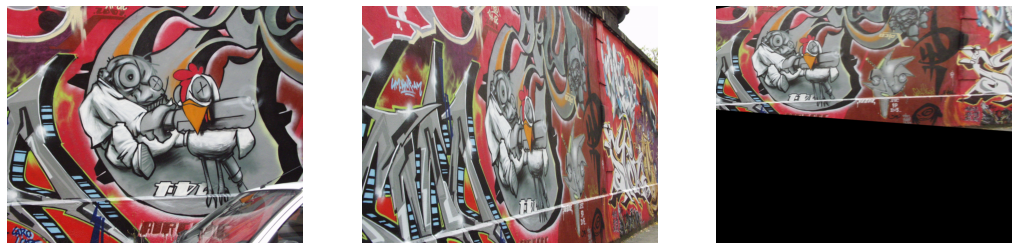

In [332]:
H15 = np.matmul(H14,H45)
print("Homography Matrix of Img1 to Img5 is:",H15)
dst = cv.warpPerspective(img5,H15, (img1.shape[1] + img5.shape[1], img5.shape[0]+ img5.shape[0]))
fig,ax = plt.subplots(1,3,figsize=(18,16))
ax[0].imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(img5,cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB))
for i in range(3):
    ax[i].axis("off")

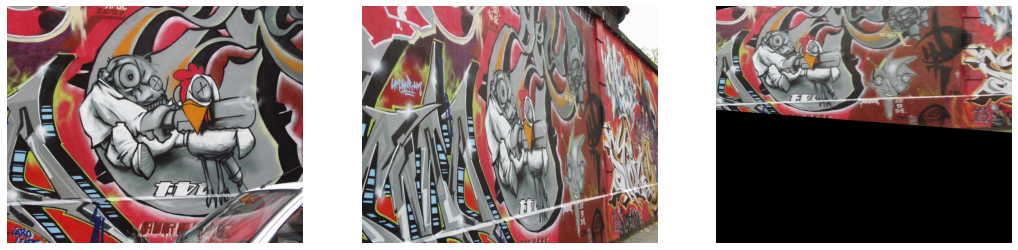

In [336]:
H = np.array([[6.2544644e-01,   5.7759174e-02,   2.2201217e+02],
   [2.2240536e-01,   1.1652147e+00 , -2.5605611e+01],
   [4.9212545e-04 , -3.6542424e-05 ,  1.0000000e+00]])

dst = cv.warpPerspective(img5,np.linalg.inv(H), (img1.shape[1] + img5.shape[1], img5.shape[0]+ img5.shape[0]))
fig,ax = plt.subplots(1,3,figsize=(18,16))
ax[0].imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(img5,cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB))
for i in range(3):
    ax[i].axis("off")